In [2]:
#!/usr/bin/env python

import sys
import numpy as np
import cv2 as cv

import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

import os
import skimage
import random

min = np.array((0), np.uint8)
max = np.array((254), np.uint8)

def getContours(path):
    fn = path # имя файла, который будем анализировать
    img = cv.imread(fn)
    #hsv = cv.cvtColor( img, cv.COLOR_BGR2GRAY  ) # меняем цветовую модель с BGR на HSV
    background = img[255][399]
    hsv = img.copy()
    for i in range(len(hsv)):
        for j in range(len(hsv[i])):
            if np.array_equal(hsv[i][j], background):
                hsv[i][j] = [255,255,255]
    #thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр
    thresh = cv.inRange( hsv, min, max )
    contours0, hierarchy = cv.findContours( thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # перебираем все найденные контуры в цикле
    controls = []
    arrayrect = []
    for cnt in contours0:
        rect = cv.boundingRect(cnt) # пытаемся вписать прямоугольник
        if rect[2]*rect[3] < 1000:
            continue
        white_images = np.zeros((100, 150, 3), np.uint8)
        white_images[:,:] = background
        crop_img = img[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
        offset = 25
        white_images[offset:offset+rect[3], offset:offset+rect[2]] = crop_img
        white_images = cv.resize(white_images, (64, 64))
        white_images = white_images/255
        controls.append(white_images)
        arrayrect.append(rect)
        
        #cv.imshow('contours', white_images)
        #cv.waitKey()
        
        #cv.drawContours(img,[box],0,(255,0,0),2) # рисуем прямоугольник
    return controls, img, arrayrect
    #cv.imshow('contours', img) # вывод обработанного кадра в окно

    #cv.waitKey()
    #cv.destroyAllWindows()

In [3]:
model = keras.models.load_model("C:/Users/Nikita/Desktop/T-Systems/Many/vggnet.model")
class_names = ['button', 'checkbox', 'radiobutton', 'slider', 'spinner', 'textbox', 'empty']

W0722 10:15:03.568047 12280 hdf5_format.py:258] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


In [4]:
def plot_value_array_one(predictions_array,):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array[i], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array[i])

  thisplot[predicted_label].set_color('blue')

In [5]:
path = "C:/Users/Nikita/Desktop/T-Systems/TrainMany/image/image-666.png"
#i=random.randint(0, 2000)
#path = "C:/Users/Nikita/Desktop/T-Systems/TrainMany/image/image-" + str(i) + ".png"
images, img, rect = getContours(path)
images = np.array(images).reshape(-1, 64, 64, 3)
predictions = model.predict(images)
possible = [0,1,2,3,5,7,8,9,10,11,12,13,15]

button at (106,142)
[('button', 0.9879282), ('checkbox', 0.0005550489), ('radiobutton', 5.8081027e-06), ('slider', 6.78624e-05), ('spinner', 3.212969e-05), ('textbox', 0.0114109265)]


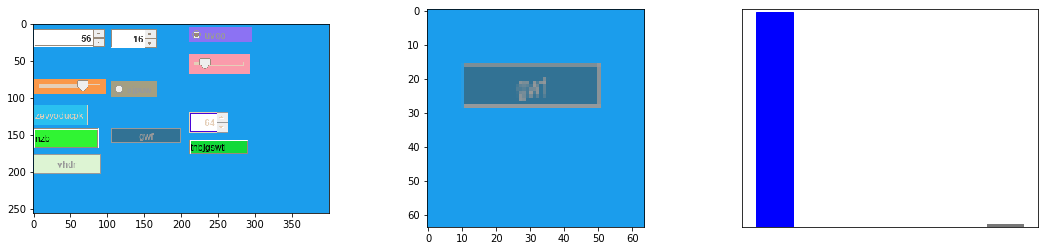

In [14]:
fig, axes = plt.subplots(1, 3)

#i=random.randint(0, len(images)-1)
i=possible[random.randint(0, len(possible)-1)]
axes[0].imshow(img)

axes[1].imshow(images[i].reshape((64, 64, 3)), cmap='gray')

print(class_names[np.argmax(predictions[i])] + " at (" + str(rect[i][0]) + "," + str(rect[i][1]) + ")")
print(list(zip(class_names, predictions[i])))

plot_value_array_one(predictions)

fig.set_figheight(4)
fig.set_figwidth(18)

plt.show()